In [138]:
"""
voc (int): xmin,ymin,xmax,ymax
yolo (float): cx,cy,w,h
coco (int): xmin,ymin,w,h
"""
import re, glob, json, random; random.seed(10)
import cv2 # imageIO and processing
import matplotlib.pyplot as plt # show

color = [ (random.randint(0,255),random.randint(0,255),random.randint(0,255)) for i in range(90) ]
D = {}

In [150]:
def getBoxes(imgPath,annotFolder,classList):
    if glob.glob(annotFolder+"/*.xml"): # Pascal VOC
        annotPath = f"{annotFolder}/{imgPath.split('/')[-1][:-4]}.xml"
        xml = open(annotPath,"r").read()
        nameL = re.findall("<name>(.*)</name>",xml)
        xminL = re.findall("<xmin>(.*)</xmin>",xml)
        yminL = re.findall("<ymin>(.*)</ymin>",xml)
        xmaxL = re.findall("<xmax>(.*)</xmax>",xml)
        ymaxL = re.findall("<ymax>(.*)</ymax>",xml)
        L = []
        for name,xmin,ymin,xmax,ymax in zip(nameL,xminL,yminL,xmaxL,ymaxL):
            L.append( (classList.index(name),int(xmin),int(ymin),int(xmax),int(ymax)) )
        return L
    elif glob.glob(annotFolder+"/*.txt"): # YOLO
        height, width, _ = cv2.imread(imgPath).shape
        annotPath = f"{annotFolder}/{imgPath.split('/')[-1][:-4]}.txt"
        L = []
        for line in open(annotPath,"r").readlines():
            id, cx, cy, w, h = line.split(" ")
            xmin = round((float(cx)-float(w)/2)*width)
            ymin = round((float(cy)-float(h)/2)*height)
            xmax = round((float(cx)+float(w)/2)*width)
            ymax = round((float(cy)+float(h)/2)*height)
            L.append([int(id),xmin,ymin,xmax,ymax])
        return L
    elif glob.glob(annotFolder+"/*.json"): # COCO
        global D
        if not D:
            D   = json.load( open(glob.glob(f"{annotFolder}/*train*.json")[0]) )
        imgName   = imgPath.split('/')[-1]
        imgDict   = list(filter(lambda d:d["file_name"]==imgName,D["images"]))[0]
        id        = imgDict["id"]
        annotDict = list(filter(lambda d:d["image_id"]==id,D["annotations"]))
        L = []
        for d in annotDict:
            cid = d['category_id']-1
            xmin, ymin, w, h = d['bbox']
            L.append([cid,int(xmin),int(ymin),int(xmin+w),int(ymin+h)])
        return L
    else:
        raise ValueError("Annotation not found")
        
def show(imgFolder,annotFolder,classList,n=10):
    global color
    for imgPath in glob.glob(imgFolder+"/*")[:n]:
        img0 = cv2.imread(imgPath)[:,:,::-1]
        img  = img0.copy()
        boxes = getBoxes(imgPath,annotFolder,classList)
        for cid,xmin,ymin,xmax,ymax in boxes:
            img[ymin-2:ymin+2,xmin:xmax,0] = color[cid][0]
            img[ymin-2:ymin+2,xmin:xmax,1] = color[cid][1]
            img[ymin-2:ymin+2,xmin:xmax,2] = color[cid][2]
            img[ymax-2:ymax+2,xmin:xmax,0] = color[cid][0]
            img[ymax-2:ymax+2,xmin:xmax,1] = color[cid][1]
            img[ymax-2:ymax+2,xmin:xmax,2] = color[cid][2]
            img[ymin:ymax,xmin:xmin+2,0] = color[cid][0]
            img[ymin:ymax,xmin:xmin+2,1] = color[cid][1]
            img[ymin:ymax,xmin:xmin+2,2] = color[cid][2]
            img[ymin:ymax,xmax:xmax+2,0] = color[cid][0]
            img[ymin:ymax,xmax:xmax+2,1] = color[cid][1]
            img[ymin:ymax,xmax:xmax+2,2] = color[cid][2]
        ax = plt.figure(figsize=(20,5))
        ax.set_facecolor("white")
        plt.subplot(1,2,1)
        plt.imshow(img0)
        plt.subplot(1,2,2)
        plt.imshow(img)
    plt.show()

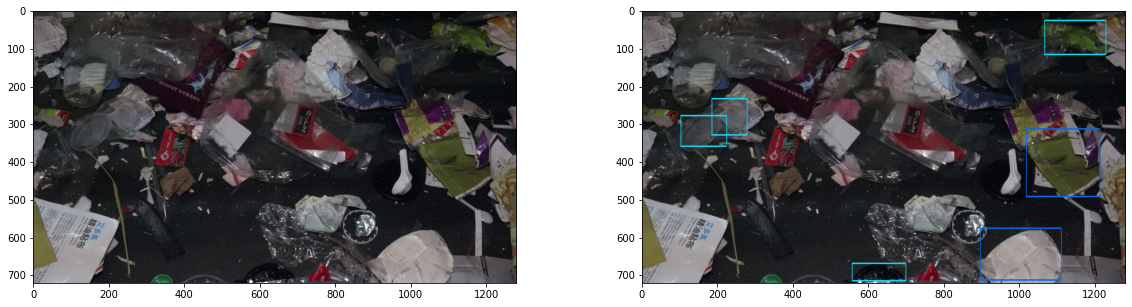

In [140]:
show("MSCoco/train2017","MSCoco/voc",["PlasticContainer","PaperContaine"],n=1)

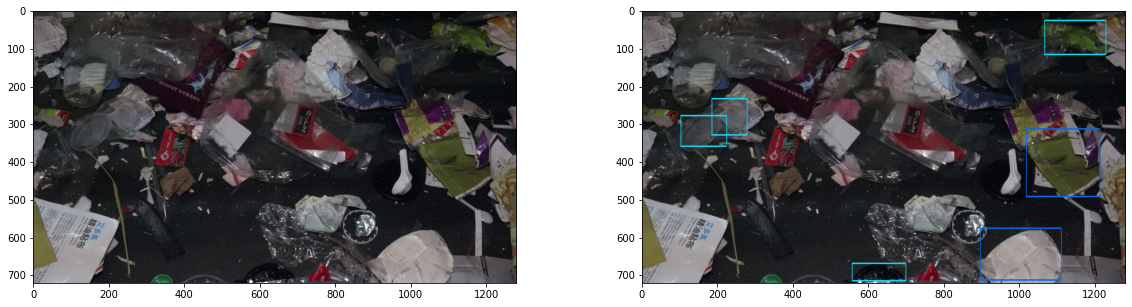

In [141]:
show("MSCoco/train2017","MSCoco/annotations",["PlasticContainer","PaperContaine"],n=1)

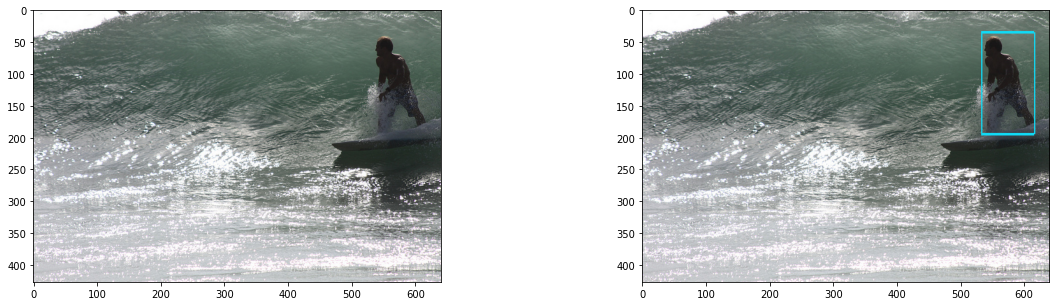

In [142]:
D = {}
show("MSCoco_raw/train2017","MSCoco_raw/annotations",[],n=1)

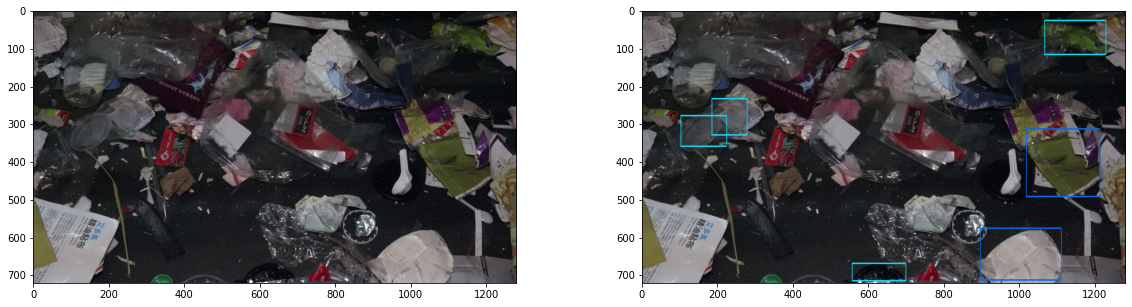

In [151]:
show("MSCoco/train2017","/home/jovyan/data-vol-2/recycling/0505DF/label",[],n=1)